![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 003 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 28/05/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0003Part002.ipynb)

In [27]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml, load_breast_cancer, load_digits, load_iris, load_wine

# Computer Vision

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [28]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [29]:
# Constants

DATA_FILE_URL   = r'None'
DATA_FILE_NAME  = r'None'

T_MNIST_IMG_SIZE = (28, 28)

TOTAL_RUN_TIME = 30 #<! Don't touch it!


In [30]:
# Auxiliary Functions

def BalancedSubSample( dfX: pd.DataFrame, colName: str, numSamples: int ):
    
    # TODO: Validate the number of samples
    # TODO: Validate the column name (Existence and categorical values)
    return dfX.groupby(colName, as_index = False, group_keys = False).apply(lambda dfS: dfS.sample(numSamples, replace = False))

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported make it clear by a comment.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [31]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 30 [Sec]


## Team Members

- `<Ilan><Schaedel><011708005>`.
- `<Barak><Ben Menachem><312527229>`.
- `<Rotem><Weissman><203958103>`

* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.
* <font color='brown'>(**#**)</font> The total run time of this notebook must be **lower than 60 [Sec]**.

In [32]:
# Students Packages to Import
# If you need a package not listed above, use this cell
# Do not use `pip install` in the submitted notebook



## Generate / Load Data

In [33]:
# Download Data
# This section downloads data from the given URL if needed.

if (DATA_FILE_NAME != 'None') and (not os.path.exists(DATA_FILE_NAME)):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 3. PCA

### 3.1. PCA Algorithm

In this section we'll implement a SciKit Learn API compatible class for the PCA.  
The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set builds the encoder / decoder.  
3. `transform()` - Applies the encoding on the input data.  
4. `inverse_transform()` - Applies the decoding on the input data.  

* <font color='brown'>(**#**)</font> You may use the [SciKit Learn's PCA module](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) as a reference.
* <font color='brown'>(**#**)</font> Both encoding and decoding applied as out of sample encoding / decoding.
* <font color='brown'>(**#**)</font> Pay attention to data structure (`N x D`).


In [34]:
class PCA:
    def __init__(self, d: int = 2):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.d = d
        self.mUd = None
        self.vMean = None
        #===============================================================#
        
    def fit(self, mX: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mX - Input data with shape N x D.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build the model encoder.
        # 2. Build the model decoder.
        # 3. Optimize calculation by the dimensions of `mX`.
        # !! You may find `scipy.sparse.linalg.svds()` useful.
        # !! You may find `scipy.sparse.linalg.eigsh()` useful.
        N, D = mX.shape
        self.vMean = mX.mean(axis=0)
        mX_centered = mX - self.vMean
        
        # If D > N compute the sigular vectors
        if D > N:
            vEigenvalues, mUd = sp.sparse.linalg.eigsh(mX_centered @ mX_centered.T, self.d, which='LM')
            sorted_indices = np.argsort(vEigenvalues)[::-1]
            sorted_vEigenvalues = vEigenvalues[sorted_indices]
            mSigma = np.diag(np.sqrt(sorted_vEigenvalues))
            mSigma_inv = np.linalg.inv(mSigma)
            self.mUd = (mSigma_inv @ mUd[:, sorted_indices].T @ mX_centered).T
            
        # If D <= N compute the eigenvector of the covariance matrix
        else:
            vEigenvalues, mUd = sp.sparse.linalg.eigsh(mX_centered.T @ mX_centered, k=self.d, which='LM')
            sorted_indices = np.argsort(vEigenvalues)[::-1]
            self.mUd = mUd[:, sorted_indices]
        #===============================================================# 
        
        return self
    
    def transform(self, mX: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) encoding
        Args:
            mX - Input data with shape N x D.
        Output:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model encoder.
        # return (mX - np.atleast_1d(self.vMean)) @ self.mUd
        
        mZ = (mX - np.atleast_1d(self.vMean)) @ self.mUd
        #===============================================================#

        return mZ
    
    def inverse_transform(self, mZ: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) decoding
        Args:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        Output:
            mX - Reconstructed data with shape N x D.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model decoder.
        # return (mZ @ self.mUd.T) + np.atleast_1d(self.vMean)
        
        mX = mZ @ self.mUd.T + np.atleast_1d(self.vMean)
        #===============================================================#

        return mX


* <font color='red'>(**?**)</font> In the class we use _out of sample_ encoding / decoding. What if we use the same `mX` for training and the encoding?  
Make sure to understand this before proceeding.

### 3.2. PCA Application

In this section the PCA (Using the above class) will be applied on several data sets:

 * Breast Cancer Dataset - Loaded using `load_breast_cancer()`.
 * Digits Dataset - Loaded using `load_digits()`.
 * Iris Dataset - Loaded using `load_iris()`.
 * Wine Dataset - Loaded using `load_wine()`.

For each data set:

1. Make yourself familiar with the data set:
    * How many features are there ($D$).
    * How many samples are there ($N$).
    * Do all features have the same unit?
2. Apply a Pre Process Step  
   In ML, usually, if the features do not have the same unit they are normalized.  
   Namely, make each feature with zero mean and unit standard deviation.   
   Write a function to normalize input data.
3. Apply the PCA  
   Set `d` to be visualization friendly and apply PCA from $D$ to $d$.  
   The obtained the low dimensional data represents $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$.
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to the data labels.  
   For each data set show result with the normalization step and without it.
5. Calculate Lost Energy  
   For each plot, show the value of ${\left\| \tilde{\boldsymbol{X}} - \boldsymbol{X} \right\|}_{F}^{2}$.  
   Do this by applying `inverse_transform()` on the low dimensional data and calculate the norm.


* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> The output should be plots figures for each data set. Show them in a single figure using sub plots.

In [35]:
#===========================Fill This===========================#
# 1. Implement the normalization function.
# !! Make sure to address the remark.

def NormalizeData(mX: np.ndarray) -> np.ndarray:
    '''
    Normalize data so each feature has zero mean and unit standard deviation.
    Args:
        mX  - Input data with shape N x d.
    Output:
        mY  - Output data with shape N x d.
    Remarks:
        - Features with zero standard deviation are not scaled (Only centered).
    '''
    mean = np.mean(mX, axis=0)
    std = np.std(mX, axis=0)
    mY = (mX - mean)
    mY[:, std!=0] /= std[std!=0]
    
    return mY
#===============================================================#

Breast Cancer - Number of features: 30, Number of samples: 569
Digits - Number of features: 64, Number of samples: 1797


Iris - Number of features: 4, Number of samples: 150
Wine - Number of features: 13, Number of samples: 178


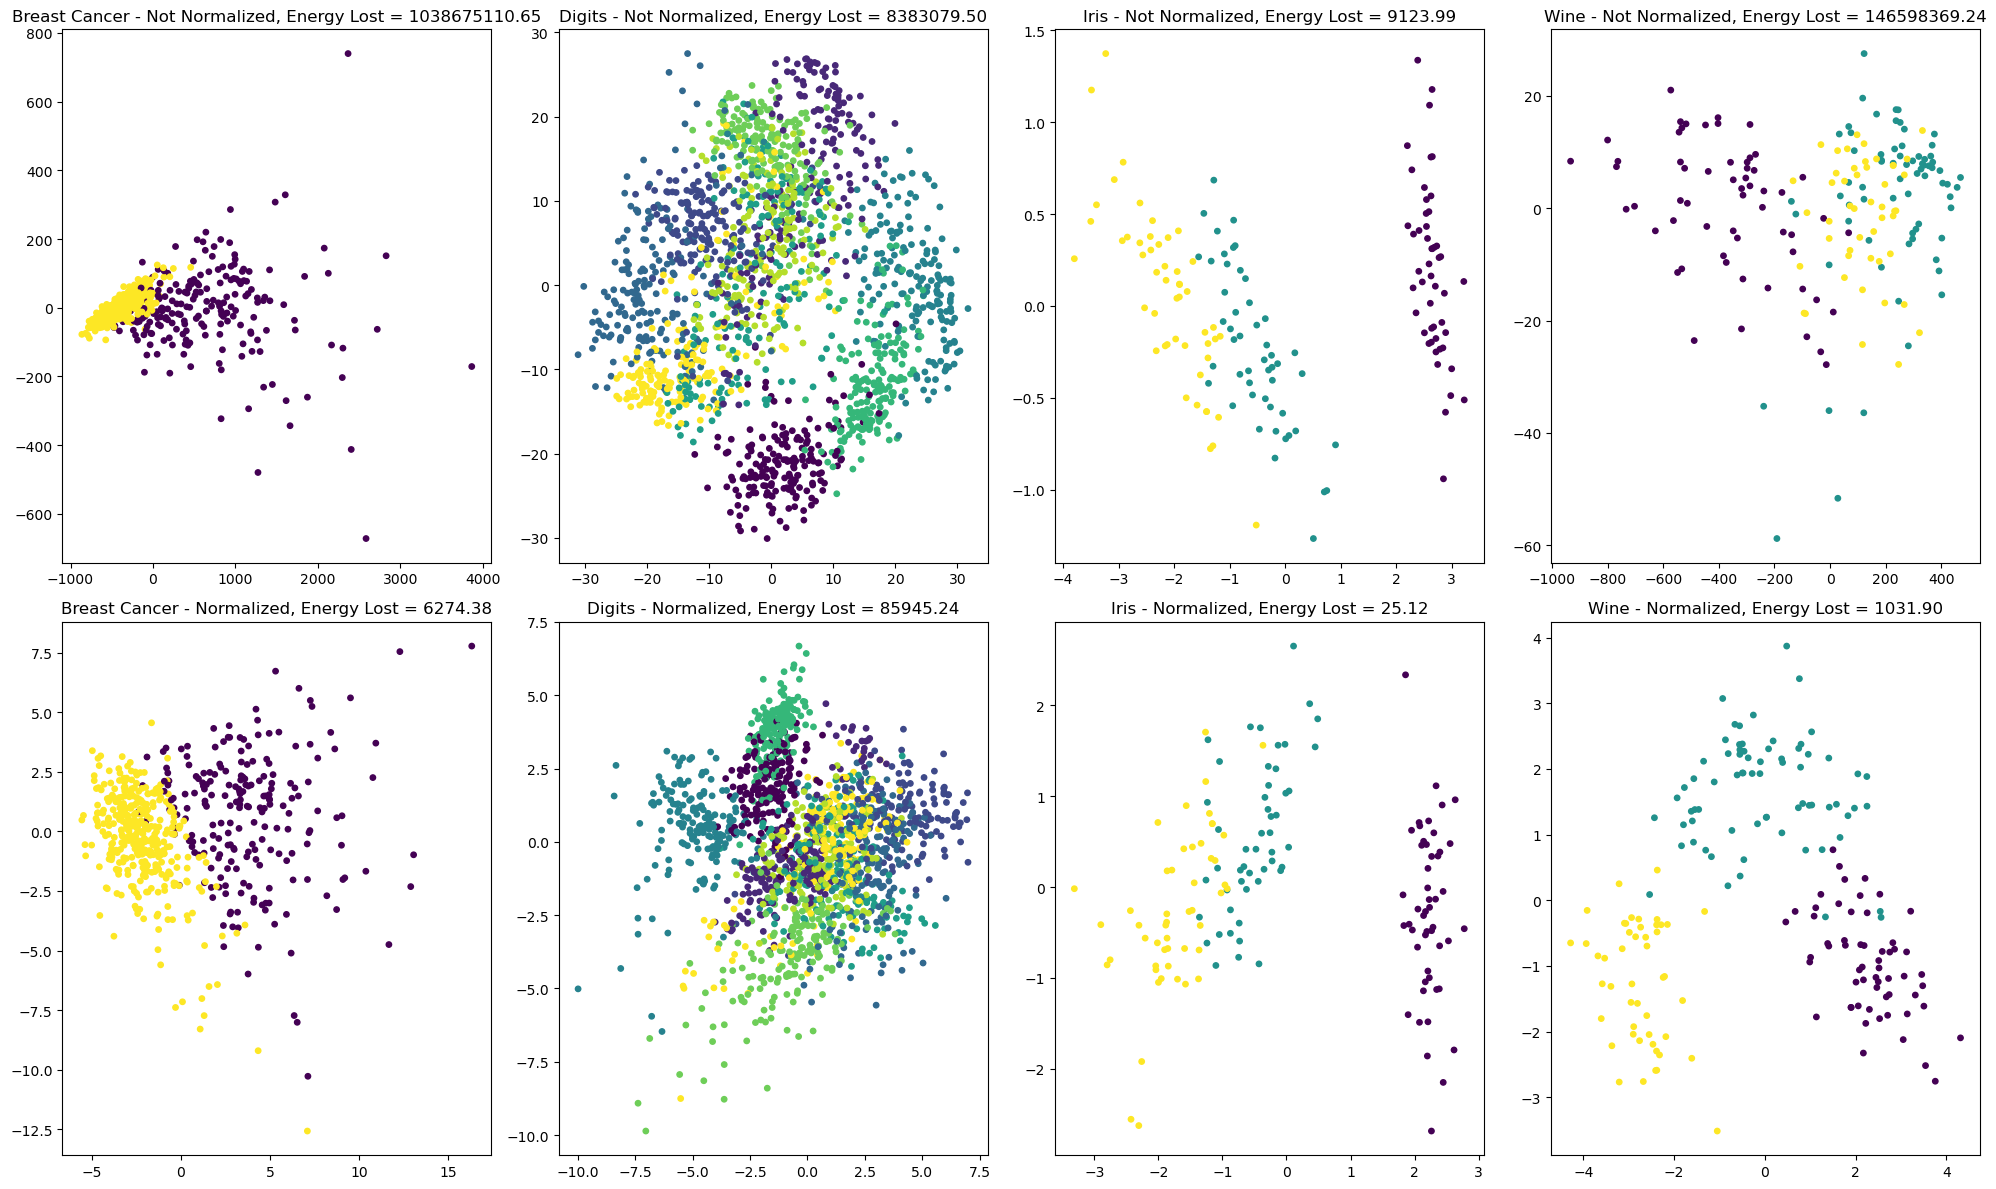

In [36]:
#===========================Fill This===========================#
# 1. Set parameter `d`.
# 2. Load each data set.
# 3. Apply PCA to each data set with and without normalization.
# 4. Display results as scatter data.
# !! The figure should be 2 x numDataSets.

d = 2
pca = PCA(d)
datasets = [load_breast_cancer(), load_digits(), load_iris(), load_wine()]
titles = ['Breast Cancer', 'Digits', 'Iris', 'Wine']
hF, hAs = plt.subplots(nrows=2, ncols=4, figsize=(20,12))

for i, dataset in enumerate(datasets):
    mX = dataset.data
    D = mX.shape[1]
    N = mX.shape[0]
    print(f'{titles[i]} - Number of features: {D}, Number of samples: {N}')
    
    mX_normalized = NormalizeData(mX)
    mZ = pca.fit(mX).transform(mX)
    mZ_normalized = pca.fit(mX_normalized).transform(mX_normalized)
    
    mX_decoded = pca.inverse_transform(mZ)
    mX_normalized_decoded = pca.inverse_transform(mZ_normalized)
    
    lost_energy = np.linalg.norm(mX_decoded - mX)**2
    lost_energy_normalized = np.linalg.norm(mX_normalized_decoded - mX_normalized)**2

    hAs[0][i].scatter(mZ[:,0],mZ[:,1], c=dataset.target, s=15)
    hAs[0][i].set_title(f'{titles[i]} - Not Normalized, Energy Lost = {lost_energy:.2f}')
    hAs[1][i].scatter(mZ_normalized[:,0],mZ_normalized[:,1], c=dataset.target, s=15)
    hAs[1][i].set_title(f'{titles[i]} - Normalized, Energy Lost = {lost_energy_normalized:.2f}')

plt.tight_layout()
plt.show()

#===============================================================#

### 3.3. Question

In the above, why does the results of the normalized and non normalized data are different?  
Address the geometry of the results and the value of the reconstruction error.

### 3.3. Solution

When dealing with un-normalized data, we can get a biased toward the features with the largest range.

Since PCA selects the $d$ dimensions with the most variance, if we have certain axis along which the data spreads alot, let say between $0$ to $100$, will have larger variance than a data between $0$ to $5$, even if it adds more information on the data.

We can see that the normalized data lost less energry because the points $\tilde{x}_i$ and $x_i$ can't be too far from each other due to normalization.

---

## 4. Image Denoising

In this section the PCA algorithm will be used for denoising images from the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database).  
In this section:

 1. Load Data  
    Load the MNIST data set and sub sample it.  
    We'll have a perfectly balanced data set.
    The data will be in `mX` and labels in `vY`.  
    This is already implemented.
 2. Add Noise  
    We'll add noise to the data.  
    The noise of the data will be modeled as a Poisson Noise (Also known as [_Shot Noise_](https://en.wikipedia.org/wiki/Shot_noise)).  
    The _Shot Noise_ is a classic model of noise gathered by imaging sensors.  
    This is already implemented.
 3. Analyze the Data  
    Analyze the spectrum of the data and choose an appropriate ste of parameters for denoising.
 3. Apply Denoising  
    Apply denoising by utilizing the PCA algorithm.
 4. Analyze Result  
    Show the results as a function of the parameters.

In [37]:
# Parameters
numSamplesClass = 600
λ               = 35

In [38]:
# Load Data
# If you get SSL error, uncomment the following 2 lines
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
dfX, dfY = fetch_openml(name = 'mnist_784', version = 1, return_X_y = True, as_frame = True, parser = 'auto')


In [39]:
# Sub Sample Data
dfData = pd.concat((dfX, dfY), axis = 1)

# Balanced Sub Sample
# End Result: 'numSamplesClass' samples per digit
dfData = BalancedSubSample(dfData, 'class', numSamplesClass)
vY = dfData['class'].to_numpy(dtype = np.uint8)
mX = dfData.drop(columns = ['class']).to_numpy()

In [40]:
# Add Poisson Noise
mN = np.random.poisson(λ, size = mX.shape) #<! Noise samples

In [41]:
# Add Noise
# Make sure values are in {0, 1, 2, ..., 255} range
mXRef = mX.copy() #<! Reference with no noise
mXRef = mXRef / 255

mX += mN
mX = np.minimum(mX, 255)


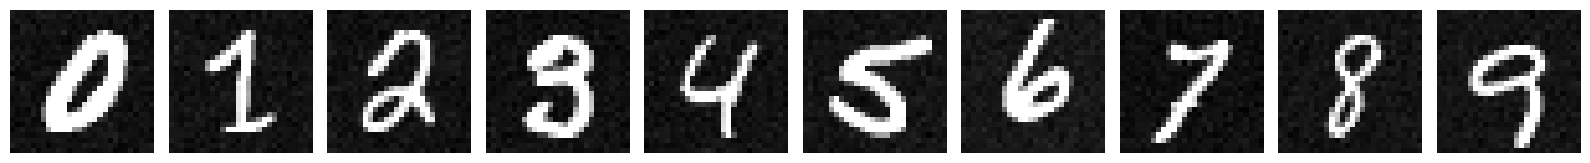

In [42]:
# Show Samples

lIdx = [np.flatnonzero(vY == ii)[0] for ii in range(10)]

_, mHA = plt.subplots(1, 10, figsize = (16, 4))
for ii, hA in enumerate(mHA.flat):
    idx = lIdx[ii]
    mI  = np.reshape(mX[idx], T_MNIST_IMG_SIZE)
    # mI  = np.clip(mI, 0, 1)
    hA.imshow(mI, cmap = 'gray')
    hA.axis('off')
    
plt.tight_layout()
plt.show()

### 4.1. The Data Spectrum

In this section:

 1. Pre Process the data (Optional).  
    Do this step if you think it is needed.
 2. Plot the Spectrum of the Eigen Values of the data.
 3. Choose **a range** (5 values) of `d` for the low dimensionality reduction.
 4. For each `d` value, calculate the **relative energy loss**.


In [43]:
#===========================Fill This===========================#
# 1. Pre Process Data (Optional).
# !! Make sure to keep the name of the data `mX`.
# !! Don't change the order of the data so it matches `vY`.

pass
#===============================================================#

In [44]:
#===========================Fill This===========================#
# 1. Calculate the spectrum of the Eigen Values of the data.

N, D = mX.shape
# Σ_x = np.cov(mX.T)
# v_eigenvalues,m_eigenvectors = np.linalg.eig(Σ_x)
# v_eigenvalues_spectrum = np.sort(v_eigenvalues)[::-1]
# v_relative_energy = v_eigenvalues_spectrum / np.sum(v_eigenvalues_spectrum)

mX_centered = mX - mX.mean(axis=0)
vEigenvalues, mEigenvetors = sp.linalg.eigh(mX_centered.T @ mX_centered / N)
v_eigenvalues_spectrum = np.sort(vEigenvalues)[::-1]
v_relative_energy = v_eigenvalues_spectrum / np.sum(v_eigenvalues_spectrum)

#===============================================================#

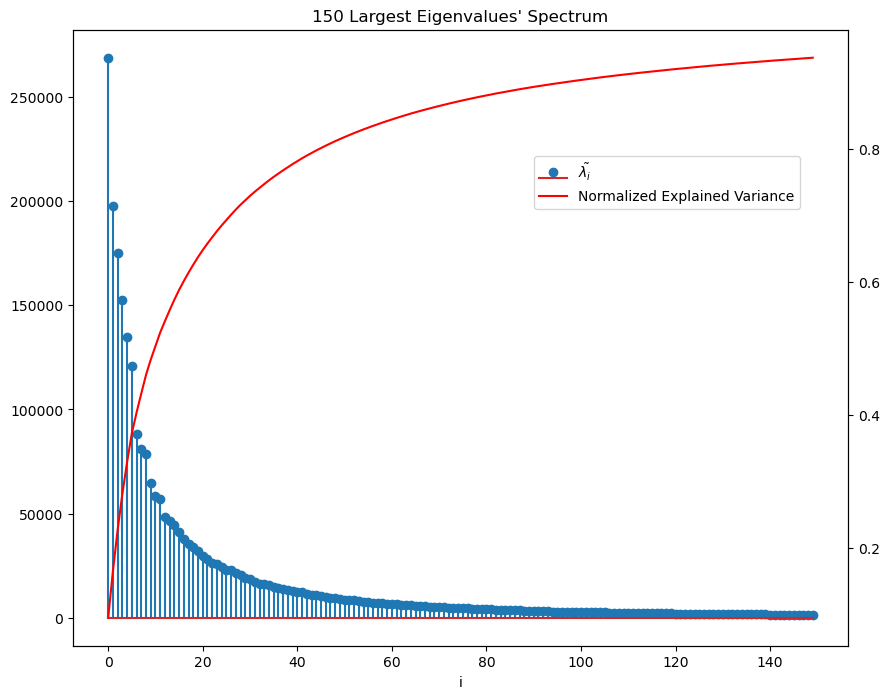

In [45]:
#===========================Fill This===========================#
# 1. Display the Spectrum.
# !! You may show both the spectrum and the relative energy.

fig, axes = plt.subplots(figsize=(10,8))
axe2 = axes.twinx()
axes.stem(v_eigenvalues_spectrum[:150], label = r"$\tilde{\lambda_i}$")
axes.set_title("150 Largest Eigenvalues' Spectrum")
axes.set_xlabel('i')
# axes.set_ylabel('Eigenvalue')

axe2.plot(range(v_relative_energy[:150].shape[0]), np.cumsum(v_relative_energy[:150]), color="r", label = "Normalized Explained Variance")
fig.legend(loc=(0.6,0.7))
# axes[1].stem(v_relative_energy[:150])
# axes[1].set_title("Eigenvalues' Relative Energy")
# axes[1].set_xlabel('i')
# axes[1].set_ylabel('Relative Energy')
plt.show()
#===============================================================#

For d = 2, the energy loss is 118845.89, calc_time = 0.1
For d = 4, the energy loss is 110258.20, calc_time = 0.1
For d = 6, the energy loss is 103074.93, calc_time = 0.1
For d = 8, the energy loss is 98018.90, calc_time = 0.1
For d = 10, the energy loss is 93533.31, calc_time = 0.1
For d = 20, the energy loss is 78364.78, calc_time = 0.2
For d = 50, the energy loss is 56050.77, calc_time = 0.2
For d = 100, the energy loss is 40678.85, calc_time = 0.2
For d = 200, the energy loss is 27167.07, calc_time = 0.4
For d = 400, the energy loss is 12051.55, calc_time = 1.4


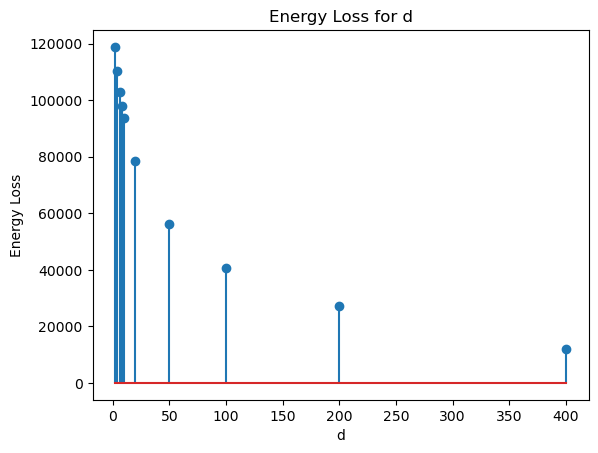

In [46]:
#===========================Fill This===========================#
# 1. Choose a range of `d` values.
# 2. Per `d` plot / display the relative energy loss.
# !! Don't choose too many, keep running time and visualization reasonable.
# !! The choice should be in order to show the effect of `d` on the results and not only the optimal `d`.

vd = np.array([2,4,6,8,10,20,50,100,200,400])

v_relative_energy_loss = np.ones_like(vd)

fitted_PCAs = []

for i, d in enumerate(vd):
    # start_i = time.time()
    pca = PCA(d).fit(mX)
    fitted_PCAs.append(pca)
    mZ = pca.transform(mX)
    mX_decoded = pca.inverse_transform(mZ)
    energy_loss = np.linalg.norm(mX - mX_decoded)
    v_relative_energy_loss[i] = (energy_loss)
    # end_i = time.time()
    print(f"For d = {d}, the energy loss is {energy_loss:.2f}, calc_time = {end_i-start_i:.1f}")

plt.stem(vd, v_relative_energy_loss)
plt.title('Energy Loss for d')
plt.xlabel('d')
plt.ylabel('Energy Loss')
plt.show()
#===============================================================#

### 4.2. PCA Based Denoising

In this section, per `d` value:

 1. Build the _Encoder_ and _Decoder_. 
 2. Denoise the images listed in the index list `lIdx`.
 3. Show results per `d`
      * For each image show the reconstruction error vs. the noisy sample (`mX`).
      * For each image show the estimation error vs. the non noisy sample (`mXRef`).

* <font color='brown'>(**#**)</font> Make sure when you use the whole data (`mX`) and when the sub set to analyze.
* <font color='brown'>(**#**)</font> For the PCA you may only use `mX`.
* <font color='brown'>(**#**)</font> The output should be the 10 images per row where the number of rows is the number of `d` values + 2 (For the reference / noisy images).

In [47]:
#===========================Fill This===========================#
# 1. Build the encoder / decoder using the `PCA` class above.
# 2. Per `d` denoise the images in `lIdx`.
# !! Only use `mX` for the PCA step.

denoised_data = []

for pca in fitted_PCAs:
    # fitted_pca = PCA(d).fit(mX)
    denoised_data.append(pca.inverse_transform(pca.transform(mX[lIdx, :])))
    
#===============================================================#

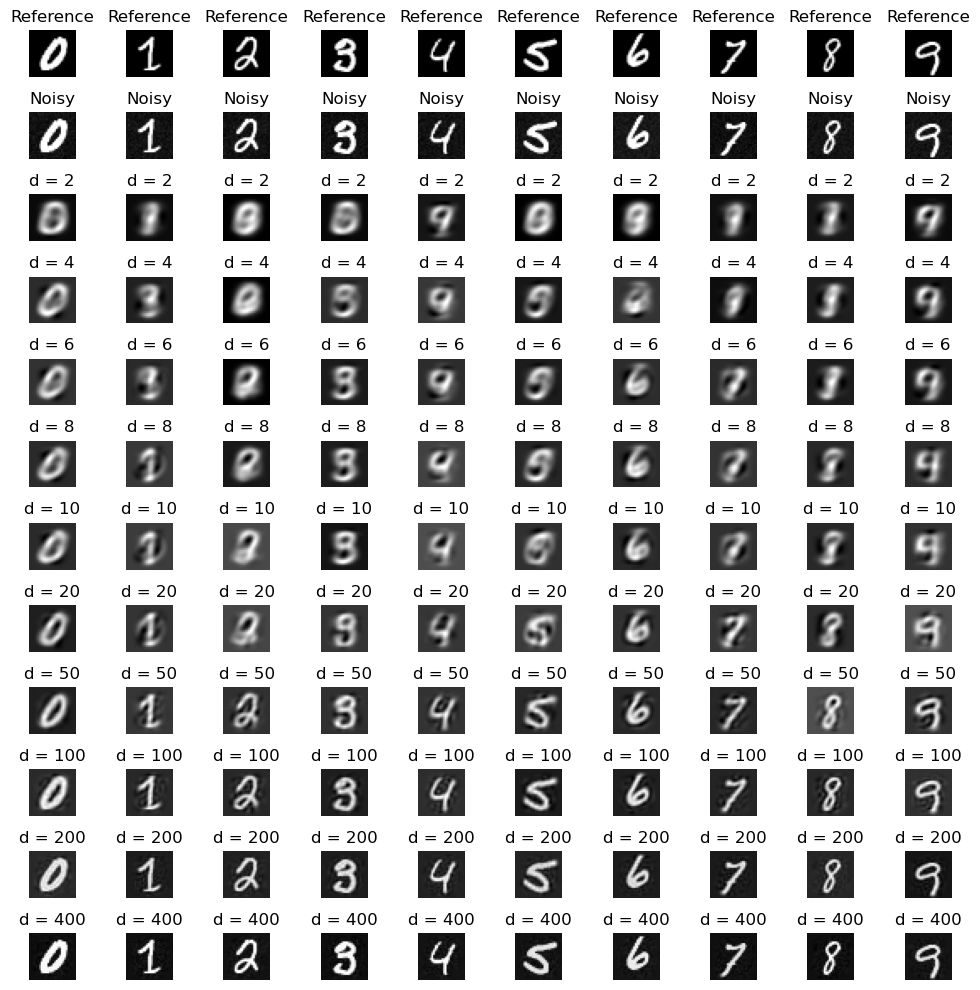

In [48]:
#===========================Fill This===========================#
# 1. Create a subplot of `len(d) + 2 x 10` plots.
# 2. In the 1st row, show the clean images (`mXRef`).
# 3. In the 2nd row, show the noisy images (`mX`).
# 4. In the next rows show the sample per different `d`.  
#    Per row, show `d`.

fig, axes = plt.subplots(ncols=10,nrows=(len(vd)+2), figsize=(10,10))

# Plot reference and noisy images:
for i in range(10):
    mI = np.reshape(mXRef[lIdx,:][i], T_MNIST_IMG_SIZE)
    axes[0][i].set_title("Reference")
    axes[0][i].imshow(mI, cmap="gray")
    axes[0][i].axis('off')

    mI = np.reshape(mX[lIdx,:][i], T_MNIST_IMG_SIZE)
    axes[1][i].set_title("Noisy")
    axes[1][i].imshow(mI, cmap="gray")
    axes[1][i].axis('off')

# Plot d images:
for i in range(10):
    for j in range(len(vd)):
        mI = np.reshape(denoised_data[j][i], T_MNIST_IMG_SIZE)
        axes[j+2][i].set_title(f"d = {vd[j]}")
        axes[j+2][i].imshow(mI, cmap="gray")
        axes[j+2][i].axis('off')

plt.tight_layout()
plt.show()

#===============================================================#

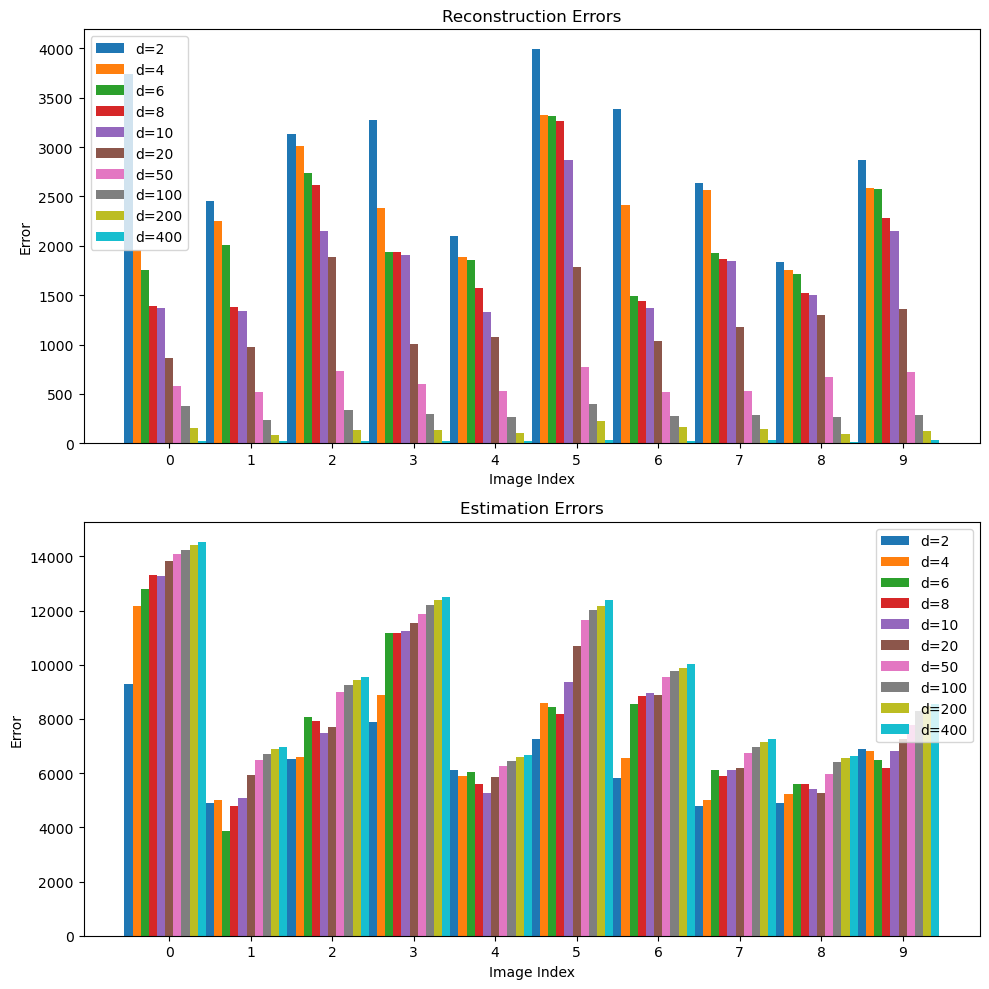

In [49]:
#===========================Fill This===========================#
# 1. Create 2 sub plots where the `x` is the image index {0, 1, ..., 9}.
# 2. The 1st plot, per `d`, shows the reconstruction error.
# 3. The 2nd plot, per `d`, shows the estimation error.

fig, axes = plt.subplots(2,1, figsize=(10,10))
axes[0].set_title('Reconstruction Errors')
axes[0].set_xlabel('Image Index')
axes[0].set_ylabel('Error')

axes[1].set_title('Estimation Errors')
axes[1].set_xlabel('Image Index')
axes[1].set_ylabel('Error')

for i in range(len(vd)):
  reconstruction_errors =  [np.mean((mX[lIdx, :][x] - denoised_data[i][x]) ** 2) for x in range(10)]
  estimation_errors = [np.mean((mXRef[lIdx, :][x] - denoised_data[i][x]) ** 2) for x in range(10)]
  offset = (i - len(vd) // 2) * 0.1
  axes[0].bar(np.arange(10)+offset, reconstruction_errors, width=0.1, label=f'd={vd[i]}')
  axes[1].bar(np.arange(10)+offset, estimation_errors, width=0.1, label=f'd={vd[i]}')

axes[0].set_xticks(np.arange(10))
axes[1].set_xticks(np.arange(10))
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()
#===============================================================#

### 4.3. Question

Address the following remarks:

 - How does the noise model effect the performance of the denoising?  
   Specifically, if the noise model was Gaussian with the same variance, what would change?
 - Would you use the reconstruction error as an estimation of the estimation error?  
   Answer in general and specifically for Images.
 - Explain the idea behind the PCA denoising.  
   Specifically address the trade off between small and large values of `d`.
 - If the data was 1D (Audio instead of Image), would you expect it to perform better?  
   Think if the model has any knowledge about the data being 2D.

### 4.3. Solution

- When the image have alot of noise, it will be harder to do the denoising. With Possion noise the range of the data could be very different in compare to the data distribution, and therefore can effect the performance of PCA. Gaussian noise on the other hand behave more similar to what the PCA trying to find - a centered data with a certain variance. So if the image had a Gaussian noise, after centering it should not effect the variance of one dimension more then the rest and therefore will have smaller effect on the PCA result.
- The reconstruction error is not a good measure since we don't want the denoised output to be too similar to the noisy input. We want to clean the noise, not reconstruct it.
- The idea behind PCA denoising is to capture the signal of the data that lies in a lower dimensional subspace. This work well the noise is white noise (i.e. have the same variance in all directions), otherwise PCA will not be a good choice (as in our case). The parameter d control how much critical components to use when reconstructing the data. When we use small d, we will reconstruct less noise but risk not reproducing the original data well enough. On the other hand, large d gives us more information on the original data, so we can reconstruct more accuratly, but we will also get more noise.
- Basically the PCA flatten the data so it doesn't know what is the dimension of the data. However, the original dimension of the data can effect the distribution of the noise and therefore effect the performance of the PCA as explained earlier.

---

### 4.4. PCA Denoising with Labels

In the above we used no knowledge on the label of the image.  
In this section you should use the labels information in order to improve results.

 1. Write a code which take advantage of the labels `vY` (Be creative).
 2. Show the plots of the reconstruction and estimation error.
 3. Explain, in words, your idea.
 4. Explain, in words, the results.

These are the images with the suggested method, and d = 400


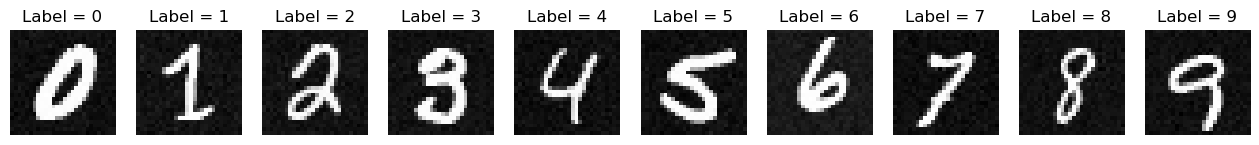

In [50]:
#===========================Fill This===========================#
# 1. Choose the maximum `d` used in the previous section.
# 2. Apply PCA Denoising on the list of images.

d = max(vd)
pca = PCA(d)
labels = np.unique(vY)
denoised_mX = np.empty_like(mX)

for label in labels:
    data = mX[vY==label]
    pca.fit(data)
    denoised_mX[vY==label] = pca.inverse_transform(pca.transform(data))

fig, axes = plt.subplots(1,10, figsize=(16,4))

for i in range(10):
    mI = np.reshape(denoised_mX[lIdx,:][i], T_MNIST_IMG_SIZE)
    axes[i].set_title(f"Label = {labels[i]}")
    axes[i].imshow(mI, cmap="gray")
    axes[i].axis('off')

print(f"These are the images with the suggested method, and d = {d}")
plt.show()
#===============================================================#

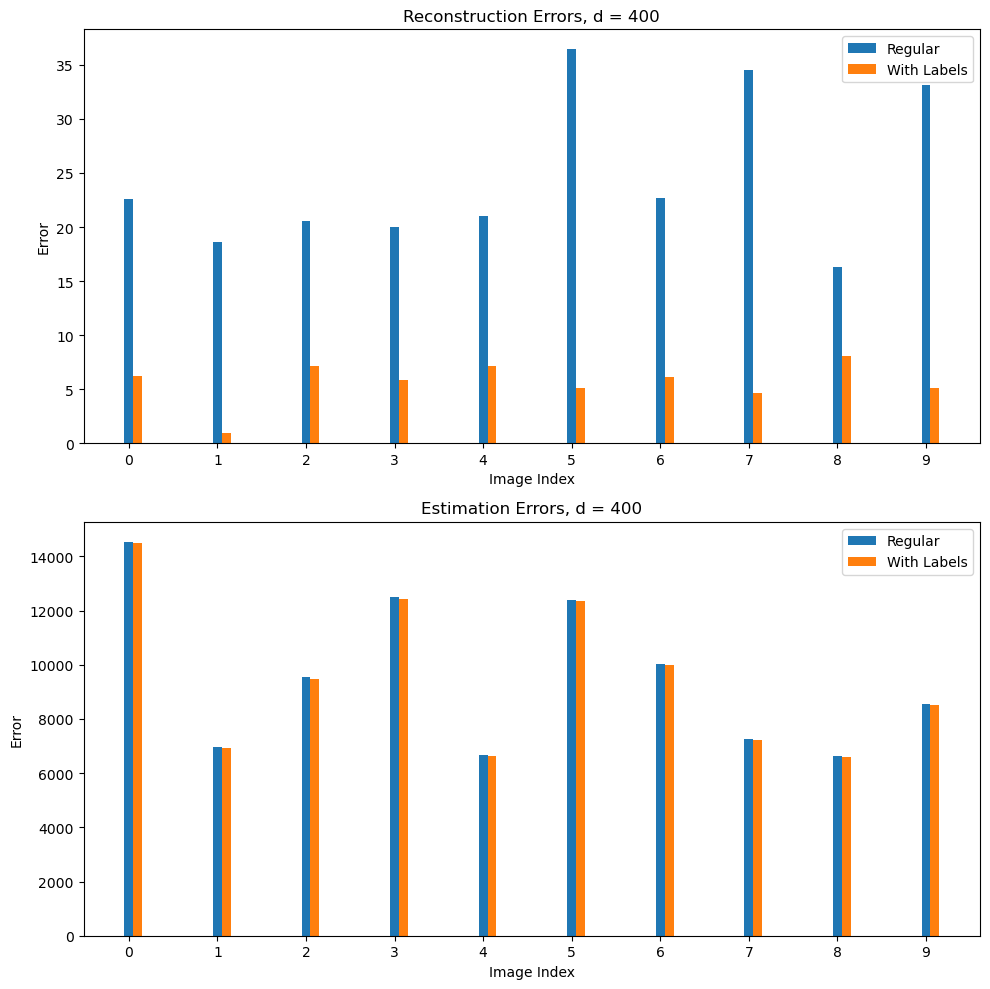

In [51]:
#===========================Fill This===========================#
# 1. Display the reconstruction and estimation error per image.
# 2. Compare to the previous result for the same `d`.

fig, axes = plt.subplots(2,1, figsize=(10,10))
axes[0].set_title(f'Reconstruction Errors, d = {d}')
axes[0].set_xlabel('Image Index')
axes[0].set_ylabel('Error')

reconstruction_errors =  [np.mean((mX[lIdx, :][x] - denoised_data[-1][x]) ** 2) for x in range(10)]
new_reconstruction_errors =  [np.mean((mX[lIdx, :][x] - denoised_mX[lIdx, :][x]) ** 2) for x in range(10)]
axes[0].bar(np.arange(10), reconstruction_errors, width=0.1, label='Regular')
axes[0].bar(np.arange(10)+0.1, new_reconstruction_errors, width=0.1, label='With Labels')

axes[1].set_title(f'Estimation Errors, d = {d}')
axes[1].set_xlabel('Image Index')
axes[1].set_ylabel('Error')

estimation_errors = [np.mean((mXRef[lIdx, :][x] - denoised_data[-1][x]) ** 2) for x in range(10)]
new_estimation_errors = [np.mean((mXRef[lIdx, :][x] - denoised_mX[lIdx, :][x]) ** 2) for x in range(10)]
axes[1].bar(np.arange(10), estimation_errors, width=0.1, label='Regular')
axes[1].bar(np.arange(10)+0.1, new_estimation_errors, width=0.1, label='With Labels')

axes[0].set_xticks(np.arange(10))
axes[1].set_xticks(np.arange(10))
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()
#===============================================================#

### 4.4.3. Solution

We use the labels to train the model on each label separatly, in the idea that each digit have different emphasises in the different features, so when we train for each digit by itself, we hope to get better results.

---

### 4.4.4. Solution

- We can see that the results for the reconstruction are much better when we used the labels in comparison to the previous parts.
- It is more visible when looking at the image we reconstructed:
    - Without the labels, the quality was very poor with this choise of d.
    - With the labels, the image is mucg closer to the original image.
- Another benefit is the running time. If we get similar results to much larger d's when using labels and a small d, this is a great benefit in running time.

---

In [52]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')

Total Run Time: 15.414007186889648 [Sec].
